In [1]:
import sys
module_path = "/root/dacon"
sys.path.append(module_path)

from utils.dataloader import SatelliteDataset, validate_separator
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

/root/miniconda3/envs/dacon/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
csv_file = "/root/dacon/data/train.csv"

validation_ratio = 0.95
data = pd.read_csv(csv_file)
data_len = len(data)
train_data = data.iloc[: int(data_len * validation_ratio), :]
validate_data = data.iloc[int(data_len * validation_ratio) :, :]
print(validate_data)

          img_id                    img_path  \
6783  TRAIN_6783  ./train_img/TRAIN_6783.png   
6784  TRAIN_6784  ./train_img/TRAIN_6784.png   
6785  TRAIN_6785  ./train_img/TRAIN_6785.png   
6786  TRAIN_6786  ./train_img/TRAIN_6786.png   
6787  TRAIN_6787  ./train_img/TRAIN_6787.png   
...          ...                         ...   
7135  TRAIN_7135  ./train_img/TRAIN_7135.png   
7136  TRAIN_7136  ./train_img/TRAIN_7136.png   
7137  TRAIN_7137  ./train_img/TRAIN_7137.png   
7138  TRAIN_7138  ./train_img/TRAIN_7138.png   
7139  TRAIN_7139  ./train_img/TRAIN_7139.png   

                                               mask_rle  
6783  184 14 272 32 384 22 485 16 585 14 1208 14 129...  
6784  27 21 200 29 431 30 660 16 1050 23 1224 29 145...  
6785  451 36 1476 34 2502 31 3527 30 4552 28 5578 25...  
6786  445 18 717 40 1469 18 2493 18 3517 18 4541 18 ...  
6787  175904 2 176926 4 177947 8 178969 10 179990 13...  
...                                                 ...  
7135  193 19 882 

In [3]:
# RLE 디코딩 함수
def rle_decode(mask_rle, shape):
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

In [4]:

# count = 0

# for idx in range(len(validate_data)):
#     img_path = validate_data.iloc[idx, 1]
#     rle_encoded = validate_data.iloc[idx, 2]
#     rle_mask = rle_decode(rle_encoded, (1024,1024))
#     image = cv2.imread("/root/dacon/data" + img_path[1:])
#     print("/root/dacon/data" + img_path[1:])
#     # print(img_path.replace(".","data"))
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     print(image.shape)
    
#     for x in range(0,1024,256):
#         for y in range(0,1024,256):
#             filename = str(count).zfill(5)
#             img = image[x:x+256,y:y+256]
#             mask = rle_mask[x:x+256,y:y+256]
#             cv2.imwrite(f"/root/dacon/data/val_img/{filename}.png", img)
#             cv2.imwrite(f"/root/dacon/data/val_mask/{filename}.png", mask*255)
#             count += 1
            
    
    # break

In [5]:
count = 0
for idx in range(len(validate_data)):
    img_path = validate_data.iloc[idx, 1]
    rle_encoded = validate_data.iloc[idx, 2]
    rle_mask = rle_decode(rle_encoded, (1024,1024))
    image = cv2.imread("/root/dacon/data" + img_path[1:])
    print("/root/dacon/data" + img_path[1:])
    # print(img_path.replace(".","data"))
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # print(image.shape)
    
    for x in range(0,1024-128,128):
        for y in range(0,1024-128,128):
            filename = str(count).zfill(5)
            # print(x,y)
            img = image[x:x+256,y:y+256]
            mask = rle_mask[x:x+256,y:y+256]
            cv2.imwrite(f"/root/dacon/data/val_img/{filename}.png", img)
            cv2.imwrite(f"/root/dacon/data/val_mask/{filename}.png", mask*255)
            count += 1
            
    

/root/dacon/data/train_img/TRAIN_6783.png
/root/dacon/data/train_img/TRAIN_6784.png
/root/dacon/data/train_img/TRAIN_6785.png
/root/dacon/data/train_img/TRAIN_6786.png
/root/dacon/data/train_img/TRAIN_6787.png
/root/dacon/data/train_img/TRAIN_6788.png
/root/dacon/data/train_img/TRAIN_6789.png
/root/dacon/data/train_img/TRAIN_6790.png
/root/dacon/data/train_img/TRAIN_6791.png
/root/dacon/data/train_img/TRAIN_6792.png
/root/dacon/data/train_img/TRAIN_6793.png
/root/dacon/data/train_img/TRAIN_6794.png
/root/dacon/data/train_img/TRAIN_6795.png
/root/dacon/data/train_img/TRAIN_6796.png
/root/dacon/data/train_img/TRAIN_6797.png
/root/dacon/data/train_img/TRAIN_6798.png
/root/dacon/data/train_img/TRAIN_6799.png
/root/dacon/data/train_img/TRAIN_6800.png
/root/dacon/data/train_img/TRAIN_6801.png
/root/dacon/data/train_img/TRAIN_6802.png
/root/dacon/data/train_img/TRAIN_6803.png
/root/dacon/data/train_img/TRAIN_6804.png
/root/dacon/data/train_img/TRAIN_6805.png
/root/dacon/data/train_img/TRAIN_6

(256, 256)


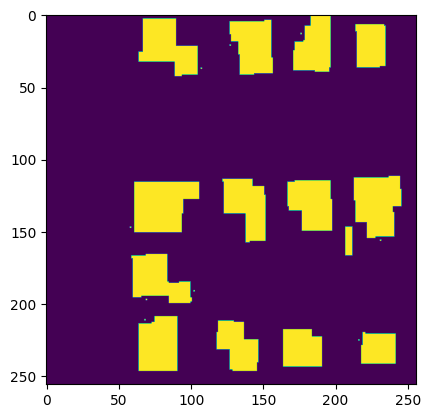

In [6]:
mask = cv2.imread("/root/dacon/data/val_mask/00000.png",0)
print(mask.shape)
plt.imshow(mask)